<a href="https://colab.research.google.com/github/AsetMuratuly/aq_workshop/blob/main/aq_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [9]:
data = pd.read_csv('data_taiwan.csv', low_memory=False)

value_columns = ['SO2', 'CO', 'O3', 'PM2.5', 'NO2', 'AMB_TEMP', 'RAINFALL', 'RH', 'WS_HR']
data = data[['time', 'station'] + value_columns].copy()
data = data[data['station'].isin(['Yonghe', 'Wanhua', 'Xindian'])].copy()
data['RAINFALL'] = data['RAINFALL'].replace('NR', 0)

# convert to numeric, errors='coerce' will convert non-numeric values to NaN
for col in value_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()

data['time'] = pd.to_datetime(data['time'], format='%Y/%m/%d %H:%M')

In [20]:
print("Data after initial cleaning and preparation:")
print(data.head().to_string())
print(f"\nShape of the data: {data.shape}")
print(f"Columns and their data types:\n{data.info()}") # Check data types after conversion and time parsing

Data after initial cleaning and preparation:
                      time station   SO2    CO    O3  PM2.5   NO2  AMB_TEMP  RAINFALL    RH  WS_HR
139896 2015-01-01 00:00:00  Wanhua  11.0  0.84  32.0   74.0  21.0      16.0       0.0  58.0    3.1
139897 2015-01-01 01:00:00  Wanhua   8.4  0.82  33.0   83.0  20.0      16.0       0.0  58.0    2.9
139898 2015-01-01 02:00:00  Wanhua   6.9  0.72  35.0   70.0  18.0      16.0       0.0  58.0    2.5
139899 2015-01-01 03:00:00  Wanhua   6.0  0.65  36.0   63.0  14.0      15.0       0.0  59.0    2.4
139900 2015-01-01 04:00:00  Wanhua   5.3  0.52  36.0   48.0  12.0      15.0       0.0  59.0    2.3

Shape of the data: (25012, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 25012 entries, 139896 to 201143
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      25012 non-null  datetime64[ns]
 1   station   25012 non-null  object        
 2   SO2       25012 non-null  floa

In [19]:
print("\nBasic Descriptive Statistics:")
print(data.describe().to_string())

print("\nPoints per station:")
print(data['station'].value_counts())


Basic Descriptive Statistics:
                                time           SO2            CO            O3         PM2.5           NO2      AMB_TEMP      RAINFALL            RH         WS_HR
count                          25012  25012.000000  25012.000000  25012.000000  25012.000000  25012.000000  25012.000000  25012.000000  25012.000000  25012.000000
mean   2015-07-01 17:28:22.126979328      2.838398      0.612927     26.516180     18.966496     19.603059     24.014193      0.290461     72.915716      1.885235
min              2015-01-01 00:00:00     -0.500000      0.050000      0.100000      0.000000      0.300000     10.000000      0.000000      1.900000      0.000000
25%              2015-04-02 19:00:00      1.500000      0.350000     13.000000     10.000000     11.000000     19.000000      0.000000     65.000000      0.900000
50%              2015-07-01 11:00:00      2.200000      0.500000     25.000000     16.000000     18.000000     25.000000      0.000000     75.000000      

In [21]:
# Temporal Aggregation - Daily Aggregation (Median)
daily_data_median = data.groupby(['station', data['time'].dt.date])[value_columns].median()
print("\nDaily Aggregation (Median):")
print(daily_data_median.head().to_string())


Daily Aggregation (Median):
                     SO2     CO    O3  PM2.5   NO2  AMB_TEMP  RAINFALL    RH  WS_HR
station time                                                                       
Wanhua  2015-01-01  3.95  0.485  26.5   32.5  20.5      14.0       0.0  53.5   2.60
        2015-01-02  1.80  0.330  28.0   12.5  18.5      14.0       0.0  55.0   3.25
        2015-01-03  2.10  0.315  25.0   11.5  19.5      17.5       0.0  59.0   2.25
        2015-01-04  2.55  0.890  11.5   27.5  34.0      18.0       0.0  68.0   0.70
        2015-01-05  4.10  1.420   3.2   34.0  43.0      19.0       0.0  75.0   0.50


In [15]:
# Grouping and Aggregation with .agg() for multiple aggregations
multi_agg_station = data.groupby('station')[value_columns].agg(['mean', 'median', 'std'])
print("\nMultiple Aggregations (.agg()) by Station:")
print(multi_agg_station.to_string())


Multiple Aggregations (.agg()) by Station:
              SO2                         CO                          O3                        PM2.5                          NO2                     AMB_TEMP                   RAINFALL                          RH                       WS_HR                 
             mean median       std      mean median       std       mean median        std       mean median        std       mean median        std       mean median       std      mean median       std       mean median        std      mean median       std
station                                                                                                                                                                                                                                                            
Wanhua   3.149785    2.4  2.737250  0.583223   0.51  0.318365  25.121338   23.0  17.544410  18.976861   16.0  13.908708  23.384101   23.0  11.123295  24.387047   25.0  5.738184

In [17]:
# Calculate mean, median, min, max for specific columns and group by station and day
multi_agg_station_day = data.groupby(['station', pd.Grouper(key='time', freq='D')]).agg({
    'SO2': ['mean', 'median', 'min', 'max'],
    'PM2.5': ['mean', 'median', 'min', 'max'],
    'AMB_TEMP': ['mean', 'median']
})
print("\nMultiple Aggregations (.agg()) by Station and Day:")
print(multi_agg_station_day.head().to_string())


Multiple Aggregations (.agg()) by Station and Day:
                         SO2                        PM2.5                      AMB_TEMP       
                        mean median  min   max       mean median   min   max       mean median
station time                                                                                  
Wanhua  2015-01-01  4.783333   3.95  2.4  11.0  36.708333   32.5  13.0  83.0  14.125000   14.0
        2015-01-02  1.908333   1.80  1.5   2.9  13.208333   12.5   6.0  20.0  14.458333   14.0
        2015-01-03  2.291667   2.10  1.7   4.0  10.958333   11.5   5.0  21.0  16.916667   17.5
        2015-01-04  2.754167   2.55  1.1   6.8  26.583333   27.5   3.0  49.0  18.000000   18.0
        2015-01-05  4.408696   4.10  1.3  10.0  29.260870   34.0   9.0  45.0  19.130435   19.0


In [18]:
correlation_matrix = data[value_columns].corr()
print("\nCorrelation matrix:")
print(correlation_matrix.to_string())


Correlation matrix:
               SO2        CO        O3     PM2.5       NO2  AMB_TEMP  RAINFALL        RH     WS_HR
SO2       1.000000  0.268813  0.014225  0.350823  0.449401  0.096423 -0.042211 -0.143835 -0.097249
CO        0.268813  1.000000 -0.273552  0.354130  0.731968  0.025817 -0.045991  0.000996 -0.358833
O3        0.014225 -0.273552  1.000000  0.226600 -0.209432  0.053303  0.001268 -0.467923  0.237644
PM2.5     0.350823  0.354130  0.226600  1.000000  0.414775 -0.101624 -0.057234 -0.215431 -0.157489
NO2       0.449401  0.731968 -0.209432  0.414775  1.000000 -0.004525 -0.028379 -0.044695 -0.342668
AMB_TEMP  0.096423  0.025817  0.053303 -0.101624 -0.004525  1.000000  0.010299 -0.342672 -0.013378
RAINFALL -0.042211 -0.045991  0.001268 -0.057234 -0.028379  0.010299  1.000000  0.162656  0.091461
RH       -0.143835  0.000996 -0.467923 -0.215431 -0.044695 -0.342672  0.162656  1.000000 -0.171863
WS_HR    -0.097249 -0.358833  0.237644 -0.157489 -0.342668 -0.013378  0.091461 -0.171863

In [ ]:
# basic t-test example
yonghe_data = data[data['station'] == 'Yonghe']['PM2.5']
wanhua_data = data[data['station'] == 'Wanhua']['PM2.5']

t_statistic, p_value = stats.ttest_ind(yonghe_data, wanhua_data, equal_var=False)

print(f"\nComparing PM2.5 between Yonghe and Wanhua stations:")
print(f"Mean PM2.5 (Yonghe): {yonghe_data.mean():.2f}")
print(f"Mean PM2.5 (Wanhua): {wanhua_data.mean():.2f}")
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")


Comparing PM2.5 between Yonghe and Wanhua stations:
Mean PM2.5 (Yonghe): 18.39
Mean PM2.5 (Wanhua): 18.98
T-statistic: -2.807
P-value: 0.005


In [ ]:
# === normality test ===
if len(yonghe_data) > 5000:
    print(f"Dataset for Yonghe PM2.5 is very large ({len(yonghe_data)}). Using a sample for Shapiro-Wilk test.")
    sample_data = yonghe_data.sample(n=5000, random_state=42) # Take a random sample
else:
    sample_data = yonghe_data

shapiro_stat, shapiro_p = stats.shapiro(sample_data)
print(f"\nShapiro-Wilk Test for Yonghe PM2.5 (sample size: {len(sample_data)}):")
print(f"Statistic: {shapiro_stat:.3f}, P-value: {shapiro_p:.3f}")

if shapiro_p < 0.05:
    print("Conclusion: The PM2.5 data for Yonghe is likely not normally distributed (p < 0.05).")
else:
    print("Conclusion: The PM2.5 data for Yonghe appears to be normally distributed (p >= 0.05).")

Dataset for Yonghe PM2.5 is very large (8210). Using a sample for Shapiro-Wilk test.

Shapiro-Wilk Test for Yonghe PM2.5 (sample size: 5000):
Statistic: 0.889, P-value: 0.000
Conclusion: The PM2.5 data for Yonghe is likely not normally distributed (p < 0.05).


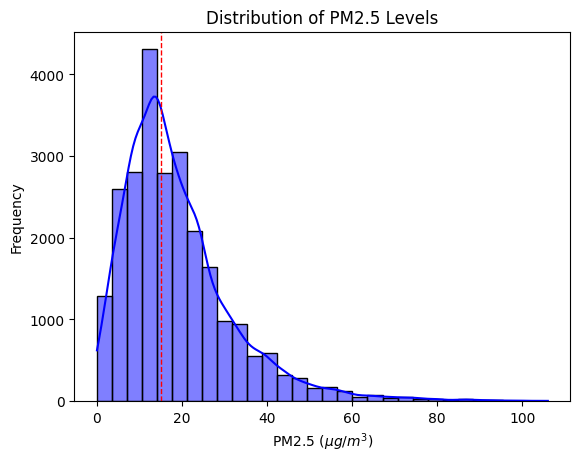

In [ ]:
sns.histplot(data['PM2.5'], bins=30, kde=True, color='blue')
plt.title('Distribution of PM2.5 Levels')
plt.xlabel(r'PM2.5 ($\mu g/m^3$)')
plt.ylabel('Frequency')
plt.axvline(15, color='red', linestyle='dashed', linewidth=1, label='Mean PM2.5')

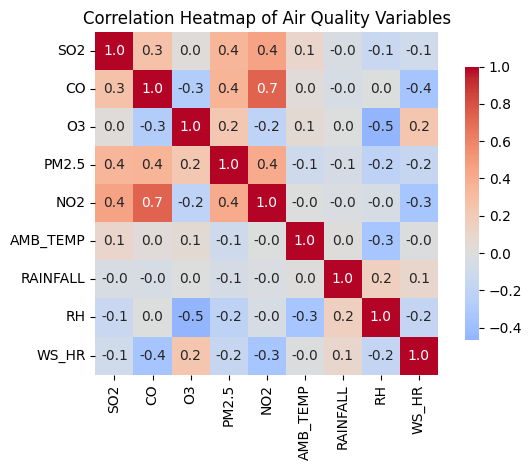

In [ ]:
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, center=0)
plt.title('Correlation Heatmap of Air Quality Variables')
plt.tight_layout()
plt.show()

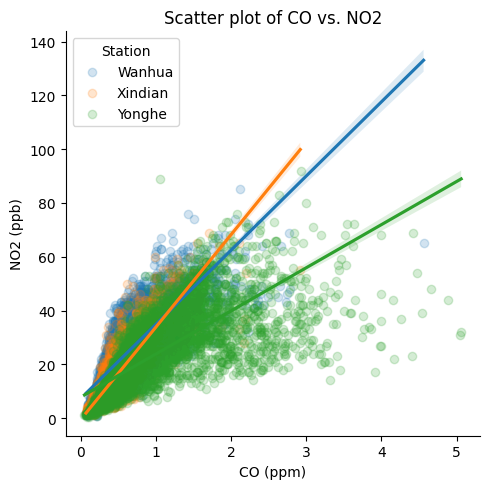

In [34]:
sns.lmplot(data=data, x='CO', y='NO2', hue='station', scatter_kws={'alpha': 0.2}, legend=False)
plt.title('Scatter plot of CO vs. NO2')
plt.xlabel(r'CO (ppm)')
plt.ylabel(r'NO2 (ppb)')
plt.legend(frameon=True, title='Station')
plt.tight_layout()
plt.show()

In [36]:
# Calculate linear regression statistics for each station
for station in data['station'].unique():
    station_data = data[data['station'] == station]
    slope, intercept, r_value, p_value, std_err = stats.linregress(station_data['CO'], station_data['NO2'])

    print(f"\nRegression for station: {station}")
    print(f"  Slope: {slope:.3f}")
    print(f"  Intercept: {intercept:.3f}")
    print(f"  R-value: {r_value:.3f}")
    print(f"  R-squared: {r_value**2:.3f}") # R-squared is the square of the R-value
    print(f"  P-value: {p_value:.3f}")
    print(f"  Standard Error: {std_err:.3f}")


Regression for station: Wanhua
  Slope: 27.574
  Intercept: 7.302
  R-value: 0.789
  R-squared: 0.623
  P-value: 0.000
  Standard Error: 0.234

Regression for station: Xindian
  Slope: 34.371
  Intercept: -0.512
  R-value: 0.856
  R-squared: 0.732
  P-value: 0.000
  Standard Error: 0.227

Regression for station: Yonghe
  Slope: 16.032
  Intercept: 7.819
  R-value: 0.751
  R-squared: 0.563
  P-value: 0.000
  Standard Error: 0.156


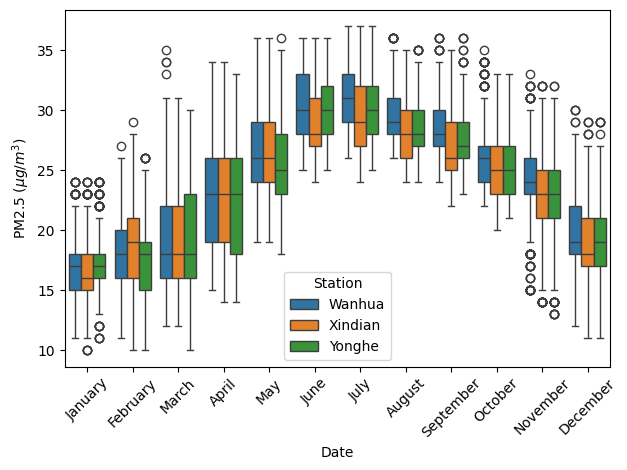

In [ ]:
sns.boxplot(
    data=data,
    x=data['time'].dt.month_name(),
    y='AMB_TEMP',
    hue='station'
)
plt.xlabel('Date')
plt.ylabel(r'PM2.5 ($\mu g/m^3$)')
plt.xticks(rotation=45)
plt.legend(title='Station')
plt.tight_layout()
plt.show()

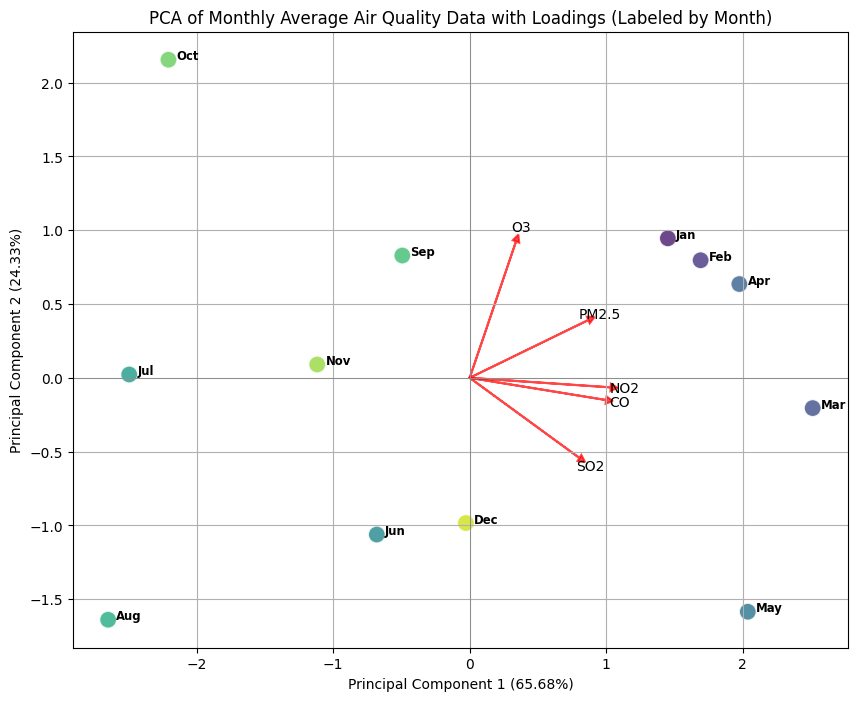


Explained variance ratio by principal components: [0.65676114 0.24334041]
Total explained variance by 2 components: 0.9001


In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Aggregate data by month
monthly_data = data.groupby(data['time'].dt.to_period('M'))[value_columns].mean().reset_index()
monthly_data['month_name'] = monthly_data['time'].dt.strftime('%b')

# Select numerical columns for PCA
pca_columns = ['SO2', 'CO', 'O3', 'PM2.5', 'NO2']

# Scale the data
scaler = StandardScaler()
scaled_monthly_data = scaler.fit_transform(monthly_data[pca_columns])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_monthly_data)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

# Add month name for labeling
pca_df['month_name'] = monthly_data['month_name'].reset_index(drop=True)

# Calculate loadings for plotting arrows
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create the plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=pca_df,
    x='principal component 1',
    y='principal component 2',
    hue='month_name',
    legend=False,
    palette='viridis',
    s=150,
    alpha=0.8
)

# Add month names as text labels next to each point
for i, row in pca_df.iterrows():
    plt.text(row['principal component 1'] + 0.06, row['principal component 2'],
             row['month_name'],
             horizontalalignment='left', size='small', color='black', weight='semibold')


# Plot loadings as arrows
for i, feature in enumerate(pca_columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='r', alpha=0.7, head_width=0.05, head_length=0.05, linewidth=1.5)
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1,
             feature, color='black', ha='center', va='center', fontsize=10)

plt.title('PCA of Monthly Average Air Quality Data with Loadings (Labeled by Month)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()

print(f"\nExplained variance ratio by principal components: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 components: {pca.explained_variance_ratio_.sum():.4f}")
